# Tests for Regression Models

In [2]:
%matplotlib notebook

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
import sys
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits.mplot3d.axes3d import Axes3D

from IPython.display import HTML

In [5]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
from regression_models import linear_regression
from regression_models import polynomial_regression

ImportError: No module named 'regression_models'

In [ ]:
from regression_models import PolynomialRegression

### Data preparation

<IPython.core.display.Javascript object>


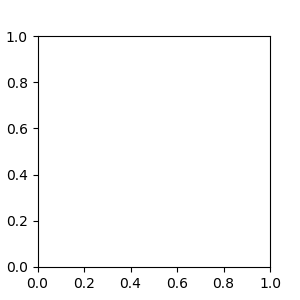

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

In [10]:
ax

In [11]:
import data.analysis_tools as tools

In [15]:
print(tools.get_stats.__doc__)


    Calculate the minimum, average,
    maximum, and range of an ndarray

    Example
    -------
    Input: (X=[1, 2, 3, 4, 5])
    Output: ArrayStats(min=1, ave=3, max=5, range=4)

    Parameters
    ----------
    X : ndarray
        The ndarray to be processed

    Returns
    -------
    ArrayStats
        A named tuple of the form (min, ave, max, range)
    


In [7]:
n = 100

In [8]:
X_domain = np.linspace(0, 2*np.pi, n)

In [9]:
X = np.empty((2, n, n))
X[0], X[1] = np.meshgrid(X_domain, X_domain)
# print(X)

In [10]:
def flux(X):
    alpha = 0.7
    phi_ext = 2 * np.pi * 0.5
    return 2 + alpha - 2 * np.cos(X[0]) * np.cos(X[1]) - alpha * np.cos(phi_ext - 2 * X[0])

In [11]:
Y = flux(X)

In [12]:
X_flat = np.column_stack((X[0].ravel(), X[1].ravel()))
Y_flat = Y.ravel()

### Regression

**Linear Regression**

In [13]:
lin_reg, lin_coefs, lin_r_squared = linear_regression(X_flat, Y_flat, verbose=True)

Linear Regression (start):
  2.7068*1 + 4.848058837e-18*x0 + -2.4240294185e-18*x1 

  R-squared: 0.0
Linear Regression (end)



In [14]:
Y_linear = lin_coefs[0] + lin_coefs[1]*X[0] + lin_coefs[2]*X[1]

**Polynomial Regression**

In [15]:
poly_model = PolynomialRegression(X, Y, degree=10)

In [16]:
poly_model.print_func()

1.409985*1 + -0.023488*x0 + -0.094125*x1 + -0.668189*x0^2 + 0.558955*x0*x1 + 1.202283*x1^2 + 1.055324*x0^3 + -0.929643*x0^2*x1 + -0.929643*x0*x1^2 + -0.204920*x1^3 + -1.249939*x0^4 + 0.733169*x0^3*x1 + 0.721269*x0^2*x1^2 + 0.733169*x0*x1^3 + 0.035376*x1^4 + 1.375498*x0^5 + -0.327991*x0^4*x1 + -0.757386*x0^3*x1^2 + -0.757386*x0^2*x1^3 + -0.327991*x0*x1^4 + -0.042773*x1^5 + -0.752346*x0^6 + 0.089111*x0^5*x1 + 0.302447*x0^4*x1^2 + 0.363349*x0^3*x1^3 + 0.302447*x0^2*x1^4 + 0.089111*x0*x1^5 + 0.012628*x1^6 + 0.211593*x0^7 + -0.014704*x0^6*x1 + -0.052238*x0^5*x1^2 + -0.092341*x0^4*x1^3 + -0.092341*x0^3*x1^4 + -0.052238*x0^2*x1^5 + -0.014704*x0*x1^6 + -0.001407*x1^7 + -0.032076*x0^8 + 0.001361*x0^7*x1 + 0.004359*x0^6*x1^2 + 0.012114*x0^5*x1^3 + 0.012396*x0^4*x1^4 + 0.012114*x0^3*x1^5 + 0.004359*x0^2*x1^6 + 0.001361*x0*x1^7 + 0.000055*x1^8 + 0.002510*x0^9 + -0.000054*x0^8*x1 + -0.000217*x0^7*x1^2 + -0.000643*x0^6*x1^3 + -0.000964*x0^5*x1^4 + -0.000964*x0^4*x1^5 + -0.000643*x0^3*x1^6 + -0.00021

In [17]:
Y_poly = poly_model.process()

### Graphs

In [18]:
model = PolynomialRegression(X, Y)

<IPython.core.display.Javascript object>


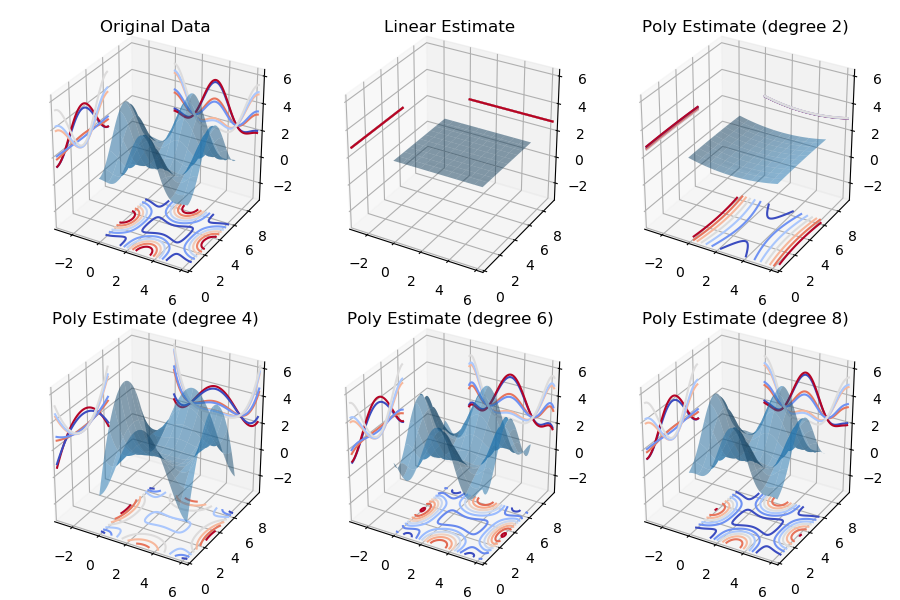

In [19]:
fig = plt.figure(figsize=(9, 6))

ax1 = fig.add_subplot(2, 3, 1, projection='3d')
model.plot(ax1, X[0], X[1], Y, lims=((-np.pi, 2*np.pi), (0, 3*np.pi), (-np.pi, 2*np.pi)), title="Original Data")

ax2 = fig.add_subplot(2, 3, 2, projection='3d')
model.plot(ax2, X[0], X[1], Y_linear, lims=((-np.pi, 2*np.pi), (0, 3*np.pi), (-np.pi, 2*np.pi)), title="Linear Estimate")

for deg in range(2, 10, 2):
    ax = fig.add_subplot(2, 3, deg//2 + 2, projection='3d')
    model.plot(ax, X[0], X[1], model.process(degree=deg).predict(), lims=((-np.pi, 2*np.pi), (0, 3*np.pi), (-np.pi, 2*np.pi)), title="Poly Estimate (degree %d)" % deg)

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


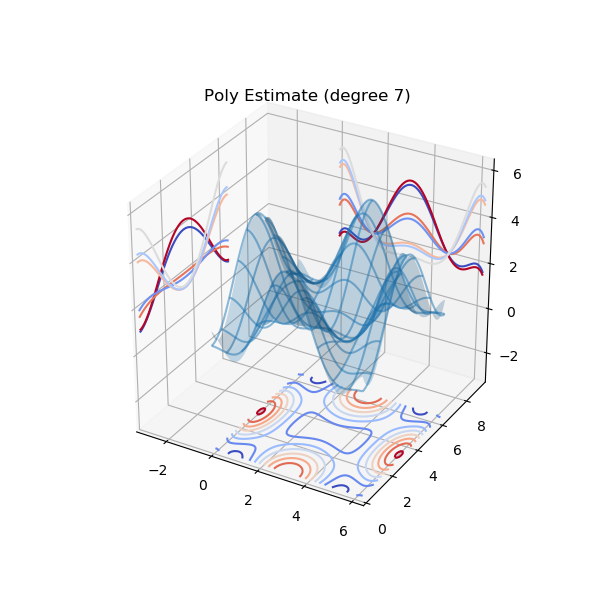

In [20]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca(projection='3d')

lims = ((-np.pi, 2*np.pi), (0, 3*np.pi), (-np.pi, 2*np.pi))

p = model.plot(ax, X[0], X[1], Y, lims=lims, wireframe=True, show_contours=False)
q = model.plot(ax, X[0], X[1], model.process(degree=1).predict(), lims=lims, alpha=0.25, show_contours=False, tight=True)

def update_func(i, q):
    ax.clear()
    p = model.plot(ax, X[0], X[1], Y, lims=lims, wireframe=True, show_contours=False)
    q = model.plot(ax, X[0], X[1], model.process(degree=i+1).predict(), lims=lims, alpha=0.25, title="Poly Estimate (degree %d)" % (i + 1))
    return q,

anim = animation.FuncAnimation(fig, func=update_func, frames=10, fargs=(q,), interval=1000, 
                               save_count=10, blit=True, repeat=True, repeat_delay=3000)
HTML(anim.to_html5_video())
rc('animation', html='html5')
plt.show()
# plt.close()
# anim